# **1️⃣2️⃣ Attention Mechanism in Transformers: How It Works & Why It's Amazing 🤖✨🎯**

## **💡 Real-Life Analogy: A Sports Commentator Focusing on Key Players 🎙️🏀⚽**

Imagine you’re watching a high-stakes basketball game. A seasoned commentator doesn’t try to describe every single move on the court—instead, they focus on the **key players** and **crucial moments** that shape the game. They “pay attention” to:

- **Star players’ movements**  
- **Critical passes**  
- **Decisive shots**

Similarly, the **attention mechanism** in Transformer models **selectively focuses** on the most important parts of the input sequence, ignoring less relevant information. This allows the model to understand context and relationships in the data—like a commentator highlighting the key plays!

## **📌 What is the Attention Mechanism?**

✅ **Attention** allows models to **weigh different parts** of the input differently, so they can focus on the most relevant information when producing an output.  
✅ In **Transformers**, it is the backbone of the model, enabling it to process sequences in parallel without recurrence.  
✅ **Self-Attention** is a specific type where each element of the sequence attends to all other elements to capture contextual relationships.

## **🔍 Mathematical Details: Scaled Dot-Product Attention**

Given:
- **Queries (Q)**, **Keys (K)**, and **Values (V)**, all represented as matrices.

The **attention mechanism** computes:

$$
\text{Attention}(Q, K, V) = \text{softmax}\Big(\frac{QK^\top}{\sqrt{d_k}}\Big) V
$$

Where:
- $Q$ = Query matrix  
- $K$ = Key matrix  
- $V$ = Value matrix  
- $d_k$ = Dimensionality of the keys (used for scaling)  
- **softmax** converts the scores into probabilities, emphasizing the most relevant keys.

### **Step-by-Step Breakdown:**

1. **Dot Product $QK^\top$**:  
   - Computes similarity between queries and keys.  
   - Higher scores indicate more relevance. 🔍

2. **Scaling by $\sqrt{d_k}$**:  
   - Prevents the dot products from growing too large in magnitude, stabilizing the gradients. 🔢

3. **Applying Softmax**:  
   - Converts scaled scores into a probability distribution.  
   - Each query then “attends” more to keys with higher probabilities. 🎯

4. **Weighted Sum (softmax output $\times V$)**:  
   - Produces a weighted sum of the values, with weights determined by the attention scores.  
   - This output represents the aggregated information that the query “pays attention” to.

## **💡 Real-Life Sports Examples Using Attention**

### **🏀 NBA Example: Highlight Reel Generation**
- **Scenario**: A model generates a highlight reel by focusing on key moments in a game.
- **Attention Use**: 
  - **Queries**: Moments in the video where a highlight might occur (e.g., a fast break).
  - **Keys/Values**: Features from all video frames (e.g., player movements, crowd reaction).
- **Outcome**: The model assigns higher attention weights to frames with spectacular dunks and clutch plays, creating an engaging highlight reel. 🎥🔥

### **⚽ Football Example: Tactical Analysis**
- **Scenario**: Analyzing a match to understand team strategy.
- **Attention Use**: 
  - Processes sequences of match events (e.g., passes, shots, defensive moves).
  - Uses self-attention to capture long-range dependencies, such as a pass from deep in defense leading to a goal.
- **Outcome**: Coaches receive insights on which plays and formations were most effective, enabling better tactical decisions. 📊📈

### **♠️ Poker Example: Decision Support**
- **Scenario**: In Texas Hold’em, a model suggests optimal moves by analyzing betting patterns over the course of a hand.
- **Attention Use**: 
  - **Queries**: Current betting round features.
  - **Keys/Values**: Historical betting actions and outcomes in the hand.
- **Outcome**: The model identifies crucial past bets that influence the current decision, helping players make smarter bets. 🃏💡

## **🛠️ Python Code Example: Scaled Dot-Product Attention**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set seed for reproducibility 🔒
np.random.seed(42)

In [3]:
def softmax(x, axis=-1):
    """Compute softmax values for each set of scores in x."""
    exps = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return exps / np.sum(exps, axis=axis, keepdims=True)

In [4]:
def scaled_dot_product_attention(Q, K, V):
    """
    Calculate the scaled dot-product attention.
    
    Parameters:
        Q: Query matrix of shape (num_queries, d_k)
        K: Key matrix of shape (num_keys, d_k)
        V: Value matrix of shape (num_keys, d_v)
    
    Returns:
        output: Attention output matrix of shape (num_queries, d_v)
        attention_weights: Attention weights matrix of shape (num_queries, num_keys)
    """
    d_k = Q.shape[1]
    # Compute the dot products between queries and keys
    scores = np.dot(Q, K.T)  # Shape: (num_queries, num_keys)
    # Scale scores
    scores_scaled = scores / np.sqrt(d_k)
    # Apply softmax to get attention weights
    attention_weights = softmax(scores_scaled, axis=1)
    # Multiply by values to get the final output
    output = np.dot(attention_weights, V)
    return output, attention_weights

In [5]:
# Simulate random data for queries, keys, and values 🎲
num_queries = 5
num_keys = 8
d_k = 4  # Dimensionality of keys/queries
d_v = 6  # Dimensionality of values

In [6]:
Q = np.random.rand(num_queries, d_k)
K = np.random.rand(num_keys, d_k)
V = np.random.rand(num_keys, d_v)

In [7]:
display(Q, K, V)

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497, 0.18340451],
       [0.30424224, 0.52475643, 0.43194502, 0.29122914]])

array([[0.61185289, 0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378, 0.51423444],
       [0.59241457, 0.04645041, 0.60754485, 0.17052412],
       [0.06505159, 0.94888554, 0.96563203, 0.80839735],
       [0.30461377, 0.09767211, 0.68423303, 0.44015249],
       [0.12203823, 0.49517691, 0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228, 0.31171108, 0.52006802],
       [0.54671028, 0.18485446, 0.96958463, 0.77513282]])

array([[0.93949894, 0.89482735, 0.59789998, 0.92187424, 0.0884925 ,
        0.19598286],
       [0.04522729, 0.32533033, 0.38867729, 0.27134903, 0.82873751,
        0.35675333],
       [0.28093451, 0.54269608, 0.14092422, 0.80219698, 0.07455064,
        0.98688694],
       [0.77224477, 0.19871568, 0.00552212, 0.81546143, 0.70685734,
        0.72900717],
       [0.77127035, 0.07404465, 0.35846573, 0.11586906, 0.86310343,
        0.62329813],
       [0.33089802, 0.06355835, 0.31098232, 0.32518332, 0.72960618,
        0.63755747],
       [0.88721274, 0.47221493, 0.11959425, 0.71324479, 0.76078505,
        0.5612772 ],
       [0.77096718, 0.4937956 , 0.52273283, 0.42754102, 0.02541913,
        0.10789143]])

In [8]:
# Compute attention output and weights
attn_output, attn_weights = scaled_dot_product_attention(Q, K, V)

In [12]:
print("🎯 Attention Output:")
display(attn_output)
print("\n🎯 Attention Weights:")
display(attn_weights)


🎯 Attention Output:


array([[0.60978992, 0.36418525, 0.28625934, 0.55607077, 0.52895233,
        0.5231956 ],
       [0.60104704, 0.36977393, 0.30302827, 0.54298296, 0.52051986,
        0.51808177],
       [0.59460655, 0.36804434, 0.29868911, 0.54540471, 0.53103534,
        0.51565288],
       [0.60025768, 0.39297011, 0.3106662 , 0.55297076, 0.49451172,
        0.51555645],
       [0.60485609, 0.37522112, 0.29680586, 0.55256315, 0.51694292,
        0.52238702]])


🎯 Attention Weights:


array([[0.09750009, 0.13006417, 0.09837628, 0.1888612 , 0.10648745,
        0.11277419, 0.12341203, 0.14252459],
       [0.11309357, 0.1249334 , 0.10393719, 0.14254958, 0.11493087,
        0.14052858, 0.12256039, 0.13746642],
       [0.1090529 , 0.14038183, 0.09571009, 0.15375199, 0.10195222,
        0.13854537, 0.12718305, 0.13342255],
       [0.12897918, 0.13012768, 0.12804696, 0.12393503, 0.11788904,
        0.112157  , 0.11959348, 0.13927163],
       [0.11106794, 0.12869153, 0.11243479, 0.15588995, 0.11533682,
        0.11585609, 0.12399871, 0.13672417]])

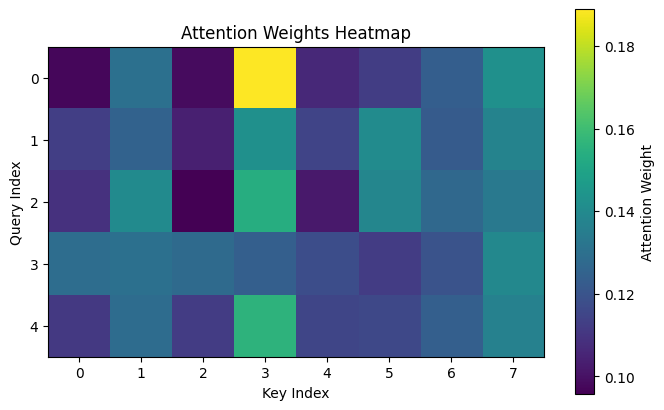

In [14]:
# Visualize attention weights as a heatmap
plt.figure(figsize=(8, 5))
plt.imshow(attn_weights, cmap='viridis')
plt.title("Attention Weights Heatmap")
plt.xlabel("Key Index")
plt.ylabel("Query Index")
plt.colorbar(label="Attention Weight")
plt.show()

### **Explanation of the Code & Output:**
- **Softmax Function**: Converts raw scores into probabilities that sum to 1 across each query. 🔢✅
- **Scaled Dot-Product Attention**:
  - **Step 1**: Computes dot products between $Q$ and $K^\top$.
  - **Step 2**: Scales the scores by $\sqrt{d_k}$ to stabilize gradients.
  - **Step 3**: Applies softmax to obtain attention weights.
  - **Step 4**: Uses these weights to compute a weighted sum of the values $V$, yielding the attention output.
- **Output**:
  - The **attention output** matrix represents aggregated information for each query.
  - The **attention weights** heatmap visually shows which keys each query focused on (darker colors indicate higher weights). 🎨👀

## **🔥 Final Takeaways**

1. **Attention Mechanism**: 
   - Allows models to **focus on the most relevant parts** of the input sequence, much like a coach or commentator paying special attention to key plays. 🏀⚽🎙️
2. **Scaled Dot-Product Attention Equation**: 
   $$
   \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^\top}{\sqrt{d_k}}\right)V
   $$
   - This formula efficiently computes which parts of the input to focus on. 🔮✨
3. **Real-Life Applications**:
   - **NBA Video Analysis**: Identifying key plays.
   - **Football Tactical Analysis**: Understanding game momentum.
   - **Poker Strategy**: Analyzing betting patterns over a hand.
4. **Python Code Example**: 
   - Demonstrates attention computations with clear visualizations of attention weights. 📊🎉
5. **Enhanced Performance**: 
   - Transformers leverage attention to process entire sequences in parallel, making them extremely effective for NLP, video analysis, and sports analytics. 🚀🤖